In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#reading dataset after importing it
!unzip /content/neo_v2.csv.zip
data = pd.read_csv(r"/content/neo_v2.csv.zip")
data.head()

Archive:  /content/neo_v2.csv.zip
  inflating: neo_v2.csv              


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
#columns of the data
data.columns

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')

In [4]:
#datatypes present in the data
data.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [5]:
del data['id']
del data['name']
del data['est_diameter_min']
del data['sentry_object']
del data['orbiting_body']
data.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.594347,73588.726663,6.143813e+07,20.00,True
2,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.570217,42737.733765,4.627557e+07,20.09,True


In [6]:
data.shape

(90836, 5)

In [7]:
#deleting duplicates in a dataset
data.drop_duplicates(inplace = True)

In [8]:
data.shape

(90829, 5)

                    est_diameter_max  relative_velocity  miss_distance  \
est_diameter_max            1.000000           0.221557       0.142244   
relative_velocity           0.221557           1.000000       0.327222   
miss_distance               0.142244           0.327222       1.000000   
absolute_magnitude         -0.560198          -0.353898      -0.264134   
hazardous                   0.183419           0.191357       0.042109   

                    absolute_magnitude  hazardous  
est_diameter_max             -0.560198   0.183419  
relative_velocity            -0.353898   0.191357  
miss_distance                -0.264134   0.042109  
absolute_magnitude            1.000000  -0.365232  
hazardous                    -0.365232   1.000000  


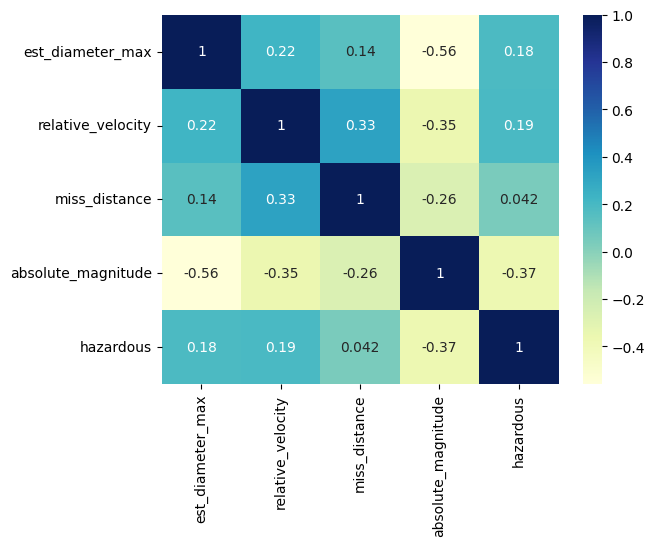

In [9]:
#correlation graph
import matplotlib.pyplot as plt
import seaborn as sb
print(data.corr())
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [10]:
print("The DataFrame object after deleting the column")
data.head()

The DataFrame object after deleting the column


,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.594347,73588.726663,6.143813e+07,20.00,True
2,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.570217,42737.733765,4.627557e+07,20.09,True


In [11]:
data.shape

(90829, 5)

In [12]:
missing_values = data.isnull().sum()

# Display the missing values count
print("Missing values count:")
print(missing_values)

Missing values count:
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64


there are no missing values in the updated dataset

In [13]:
data['hazardous'].value_counts()

False    81996
True      8833
Name: hazardous, dtype: int64

> since there are more false values than true values, we will consider True as 1 and False as 0

In [14]:
true_data = data[data['hazardous'] == True]
false_data = data[data['hazardous'] == False]
data['hazardous'] = data['hazardous'].replace({True: 1, False: 0})

**plotting graphs**

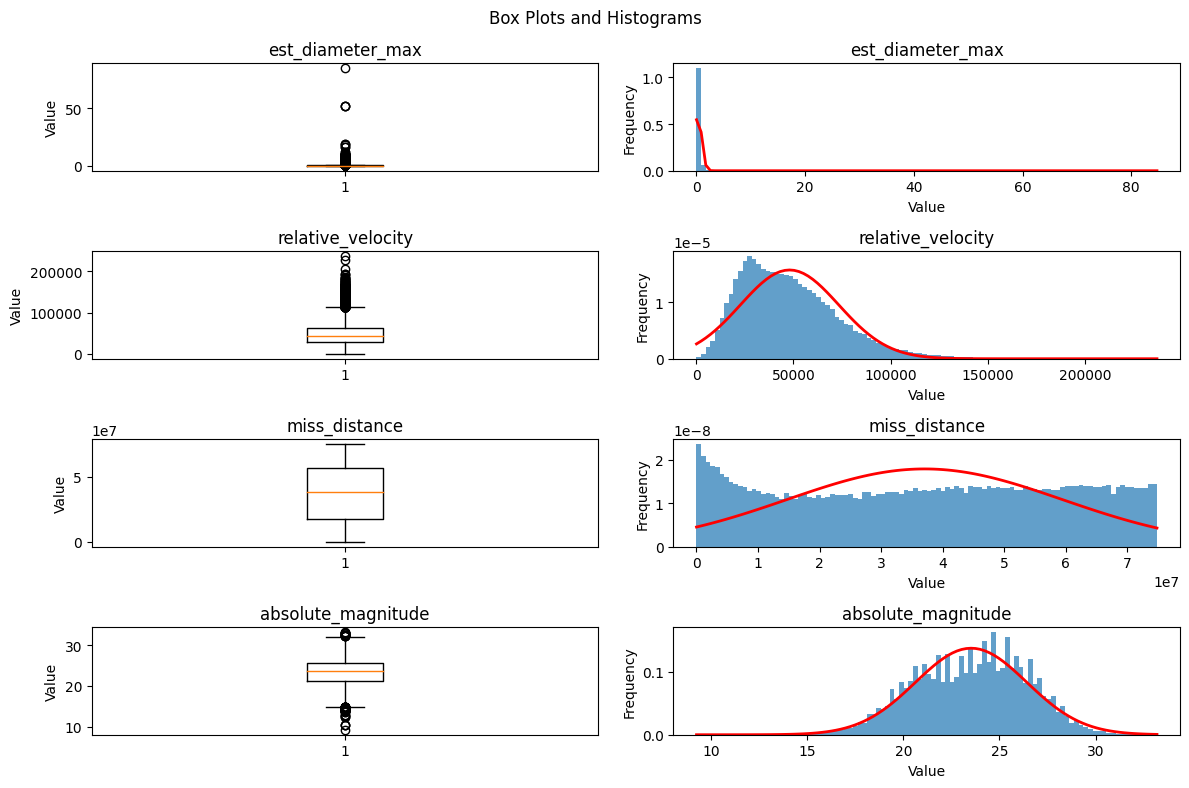

In [15]:
columns_to_plot = ['est_diameter_max','est_diameter_max','relative_velocity','relative_velocity','miss_distance','miss_distance','absolute_magnitude','absolute_magnitude']
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

# Set the main title for the entire figure
fig.suptitle('Box Plots and Histograms')

# Create a dictionary to specify plot types for each subplot
plot_types = {
    (0, 0): 'boxplot',
    (0, 1): 'histogram',
    (1, 0): 'boxplot',
    (1, 1): 'histogram',
    (2, 0): 'boxplot',
    (2, 1): 'histogram',
    (3, 0): 'boxplot',
    (3, 1): 'histogram'
}

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, 2)
    subplot = axes[row, col]

    # Set the title for each subplot
    subplot.set_title(column)

    if plot_types[(row, col)] == 'boxplot':
        # Box plot
        subplot.boxplot(data[column])
        subplot.set_ylabel('Value')
    elif plot_types[(row, col)] == 'histogram':
        # Histogram
        subplot.hist(data[column], density=True, alpha=0.7, bins = 100)
        subplot.set_xlabel('Value')
        subplot.set_ylabel('Frequency')

        # Add Gaussian curve
        mu, sigma = norm.fit(data[column])
        x = np.linspace(data[column].min(), data[column].max(), 100)
        y = norm.pdf(x, mu, sigma)
        subplot.plot(x, y, 'r-', linewidth=2)

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Display the subplots
plt.show()

In [16]:
columns = ['est_diameter_max','relative_velocity','miss_distance','absolute_magnitude']
for i in columns:
    print('the minimum value of',i,'is',data[i].min())
    print('the maximum value of',i,'is',data[i].max())
    print('\n')

the minimum value of est_diameter_max is 0.00136157
the maximum value of est_diameter_max is 84.7305408852


the minimum value of relative_velocity is 203.34643253
the maximum value of relative_velocity is 236990.1280878666


the minimum value of miss_distance is 6745.532515957
the maximum value of miss_distance is 74798651.4521972


the minimum value of absolute_magnitude is 9.23
the maximum value of absolute_magnitude is 33.2




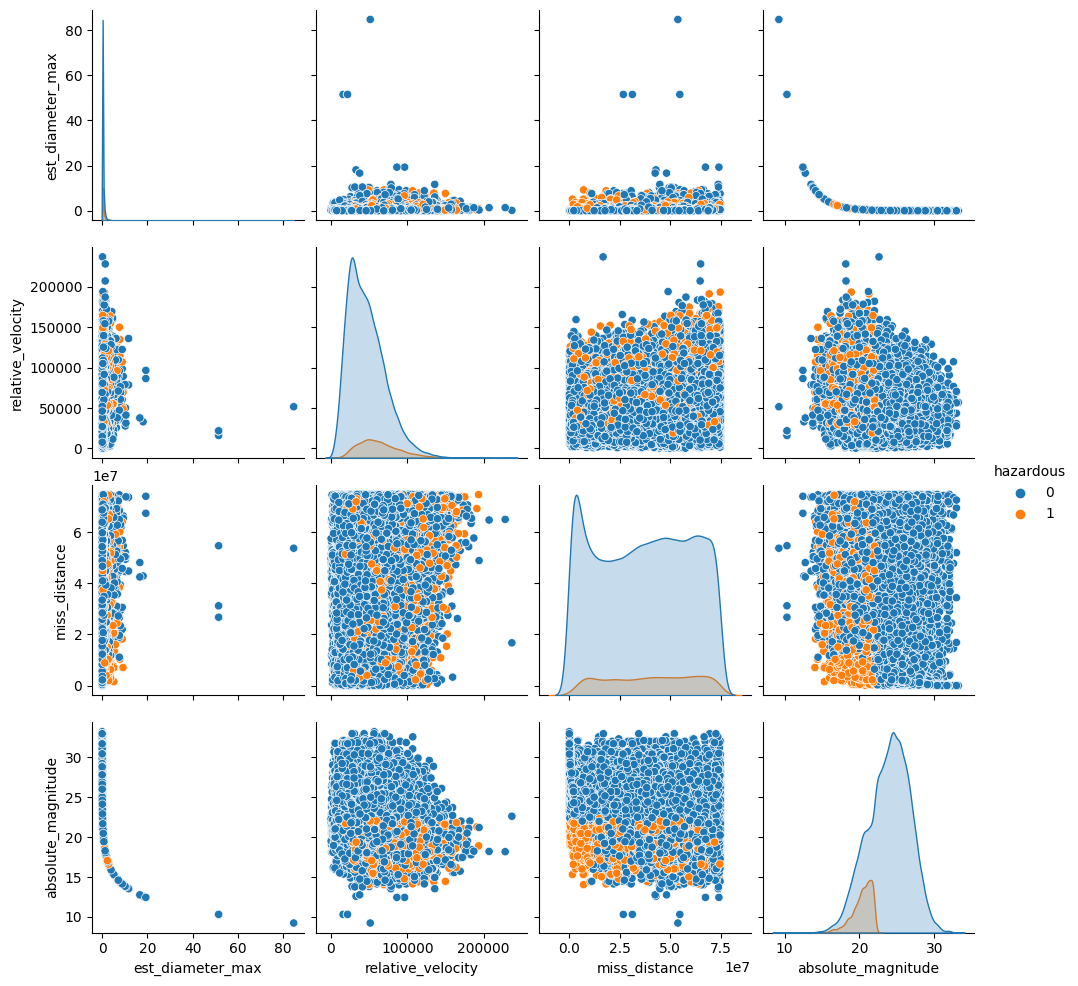

In [17]:
sb.pairplot(data,hue = 'hazardous')

Logistic Regression Accuracy: 0.9003082681933282
Logistic Regression precision: 0.4645669291338583
Logistic Regression recall: 0.06581148912437255
Logistic Regression f1: 0.1152906692721055
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     16373
           1       0.46      0.07      0.12      1793

    accuracy                           0.90     18166
   macro avg       0.69      0.53      0.53     18166
weighted avg       0.86      0.90      0.87     18166




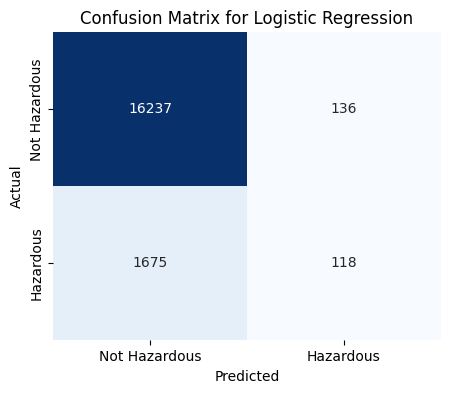

K-Nearest Neighbors Accuracy: 0.8960145326433998
K-Nearest Neighbors precision: 0.4587628865979381
K-Nearest Neighbors recall: 0.2978248745119911
K-Nearest Neighbors f1: 0.3611768684477511
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     16373
           1       0.46      0.30      0.36      1793

    accuracy                           0.90     18166
   macro avg       0.69      0.63      0.65     18166
weighted avg       0.88      0.90      0.89     18166




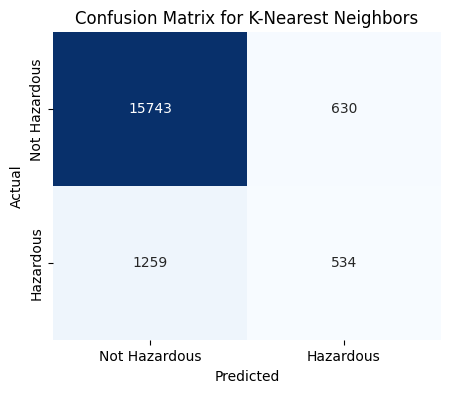

SVM Classifier Accuracy: 0.909556313993174
SVM Classifier precision: 0.79296875
SVM Classifier recall: 0.113218070273285
SVM Classifier f1: 0.19814543679843827
Classification Report for SVM Classifier:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16373
           1       0.79      0.11      0.20      1793

    accuracy                           0.91     18166
   macro avg       0.85      0.55      0.58     18166
weighted avg       0.90      0.91      0.88     18166




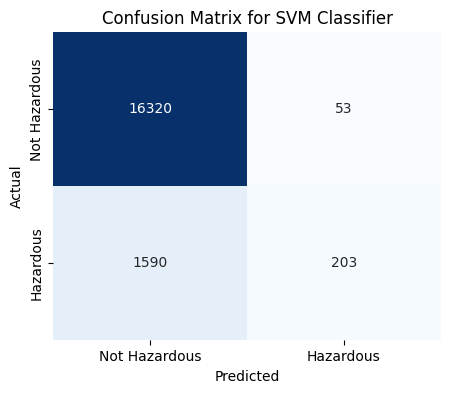

Decision Tree Classifier Accuracy: 0.8909501266101508
Decision Tree Classifier precision: 0.44946236559139785
Decision Tree Classifier recall: 0.4662576687116564
Decision Tree Classifier f1: 0.4577059950725431
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16373
           1       0.45      0.47      0.46      1793

    accuracy                           0.89     18166
   macro avg       0.70      0.70      0.70     18166
weighted avg       0.89      0.89      0.89     18166




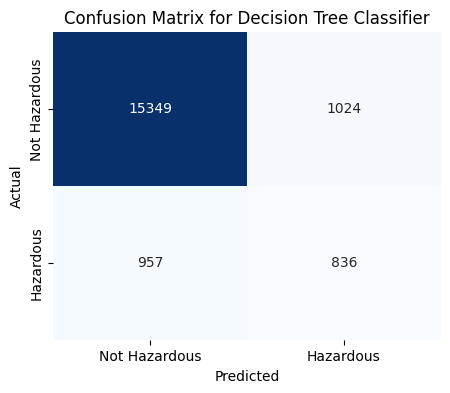

Random Forest Classifier Accuracy: 0.915721677859738
Random Forest Classifier precision: 0.6161347517730497
Random Forest Classifier recall: 0.38761851645287226
Random Forest Classifier f1: 0.4758644299897295
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     16373
           1       0.62      0.39      0.48      1793

    accuracy                           0.92     18166
   macro avg       0.78      0.68      0.72     18166
weighted avg       0.90      0.92      0.91     18166




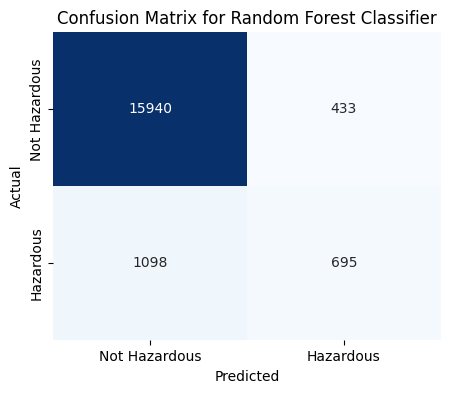

Gradient Boosting Classifier Accuracy: 0.9112077507431465
Gradient Boosting Classifier precision: 0.8061224489795918
Gradient Boosting Classifier recall: 0.13218070273284996
Gradient Boosting Classifier f1: 0.22712026832774315
Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16373
           1       0.81      0.13      0.23      1793

    accuracy                           0.91     18166
   macro avg       0.86      0.56      0.59     18166
weighted avg       0.90      0.91      0.88     18166




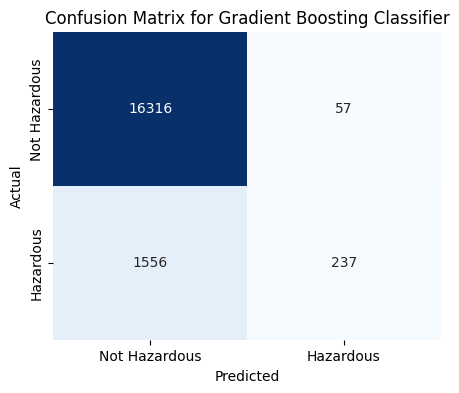

XGBoost Classifier Accuracy: 0.9134096664097765
XGBoost Classifier precision: 0.6661631419939577
XGBoost Classifier recall: 0.24595649749023982
XGBoost Classifier f1: 0.3592668024439918
Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     16373
           1       0.67      0.25      0.36      1793

    accuracy                           0.91     18166
   macro avg       0.79      0.62      0.66     18166
weighted avg       0.90      0.91      0.89     18166




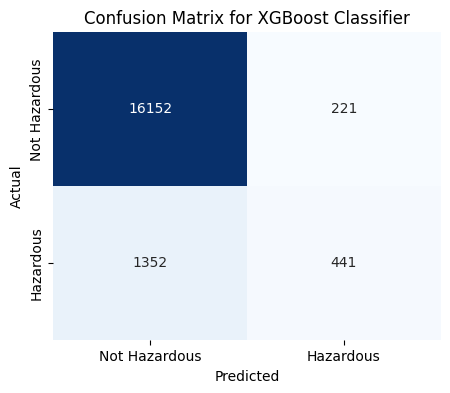

AdaBoost Classifier Accuracy: 0.9103820323681603
AdaBoost Classifier precision: 0.706766917293233
AdaBoost Classifier recall: 0.15727830451756833
AdaBoost Classifier f1: 0.2572992700729927
Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     16373
           1       0.71      0.16      0.26      1793

    accuracy                           0.91     18166
   macro avg       0.81      0.58      0.60     18166
weighted avg       0.89      0.91      0.88     18166




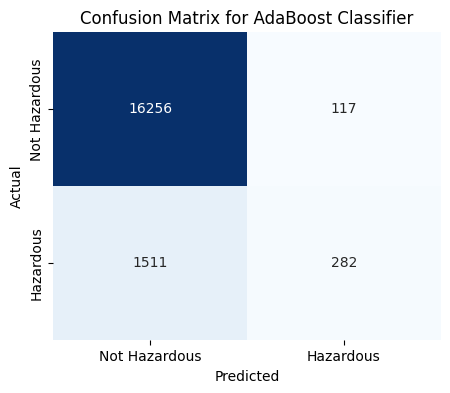

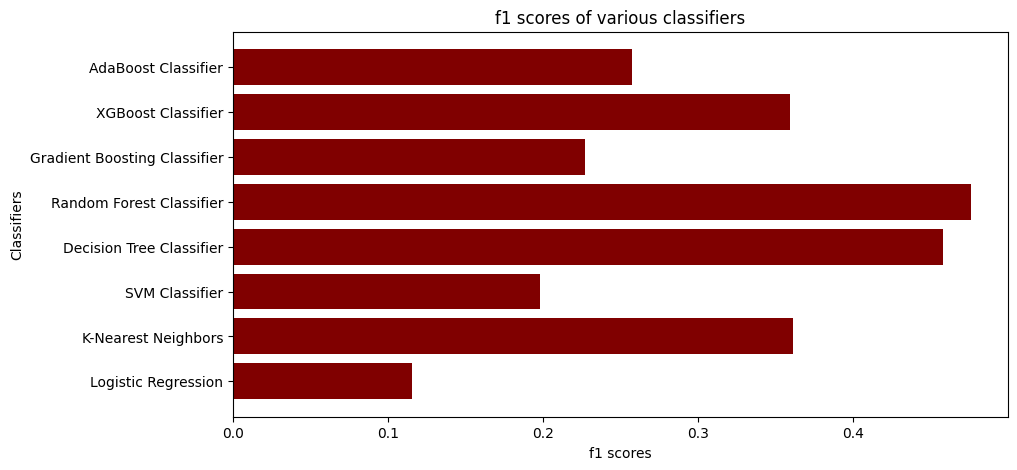

In [18]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

X = data.drop('hazardous', axis=1)
y = data['hazardous']

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''
notes
implement stratified k fold cross validation
implement grid search for one time
if taking more time change to randomised search cv
do all these changes on decision tree and random forest
scoring parameter = f1 score in randomiser cv
there should be 5 f1 score because we chose 5 folds in stratified k folds (maximum 10)
'''

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier()
}
f1score = []
# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1score.append(f1)
    report = classification_report(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} precision: {precision}')
    print(f'{name} recall: {recall}')
    print(f'{name} f1: {f1}')
    print(f'Classification Report for {name}:\n{report}\n')
    plt.figure(figsize=(5, 4))
    sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Hazardous', 'Hazardous'], yticklabels=['Not Hazardous', 'Hazardous'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

fig = plt.figure(figsize=(10, 5))
cl = list(classifiers.keys())
# creating the horizontal bar plot
plt.barh(cl, f1score, color='maroon')

plt.xlabel("f1 scores")
plt.ylabel("Classifiers")
plt.title("f1 scores of various classifiers")
plt.show()



**Checking for best hyperparameters using stratified kfold and randomizedsearchCV**

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

X = data.drop('hazardous', axis=1)  # Replace 'target_variable' with the actual target variable name
y = data['hazardous']

# Initialize a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Define the stratified k-fold cross-validator
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV with the random forest classifier, hyperparameter grid, and stratified k-fold cross-validator
randomized_search = RandomizedSearchCV(random_forest, param_grid, cv=stratified_kf, scoring='f1', n_iter=10, random_state=42)

# Fit the RandomizedSearchCV object to the data
randomized_search.fit(X, y)

# Get the best hyperparameters
best_params = randomized_search.best_params_

# Initialize an empty list to store the F1 scores and classification reports
f1_scores = []
classification_reports = []

# Perform stratified k-fold cross-validation with the best random forest classifier
for train_index, test_index in stratified_kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize a random forest classifier with the best hyperparameters
    best_random_forest = RandomForestClassifier(**best_params, random_state=42)

    # Fit the best random forest classifier on the current fold
    best_random_forest.fit(X_train, y_train)

    # Predict labels on the test set
    y_pred = best_random_forest.predict(X_test)

    # Compute the F1 score and append it to the list
    f1_scores.append(f1_score(y_test, y_pred))

    # Compute the classification report and append it to the list
    classification_reports.append(classification_report(y_test, y_pred))

mean_f1 = np.mean(f1_scores)

# Print the best hyperparameters, the list of F1 scores, and the mean F1 score
print('Best Hyperparameters:', best_params)
print('F1 Scores:', f1_scores)
print('Mean F1 Score:', mean_f1)

# Print the classification report for each fold
for i, report in enumerate(classification_reports, 1):
    print(f'Classification Report - Fold {i}:\n{report}')


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
F1 Scores: [0.477506199078994, 0.44499822000711997, 0.47235105244381026, 0.4698229129020599, 0.46606170598911073]
Mean F1 Score: 0.4661480180842189
Classification Report - Fold 1:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     16400
           1       0.64      0.38      0.48      1766

    accuracy                           0.92     18166
   macro avg       0.79      0.68      0.72     18166
weighted avg       0.91      0.92      0.91     18166

Classification Report - Fold 2:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     16399
           1       0.60      0.35      0.44      1767

    accuracy                           0.91     18166
   macro avg       0.77      0.66      0.70     18166
weighted avg

**ANN with stratified K-fold**

568/568 [==============================] - 1s 2ms/step
Fold 1 - F1 Score: 0.4781155498965463
Fold 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     16400
           1       0.33      0.85      0.48      1766

    accuracy                           0.82     18166
   macro avg       0.66      0.83      0.68     18166
weighted avg       0.92      0.82      0.85     18166



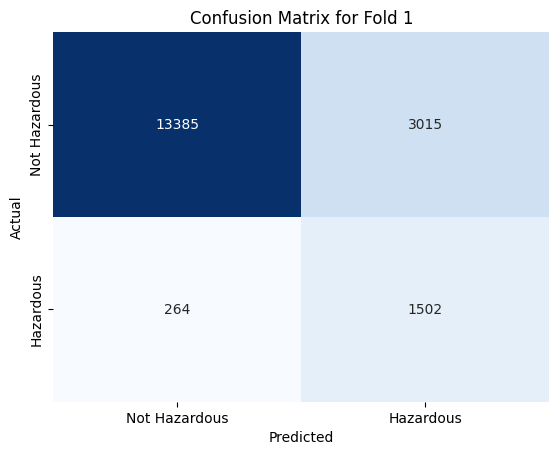

568/568 [==============================] - 1s 1ms/step
Fold 2 - F1 Score: 0.4771036061820264
Fold 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.78      0.88     16399
           1       0.32      0.94      0.48      1767

    accuracy                           0.80     18166
   macro avg       0.66      0.86      0.68     18166
weighted avg       0.93      0.80      0.84     18166



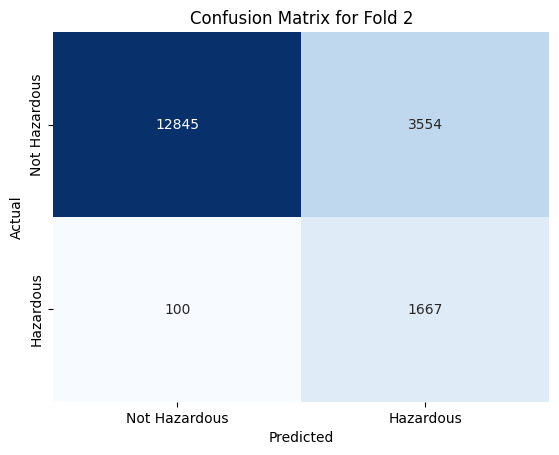

568/568 [==============================] - 1s 1ms/step
Fold 3 - F1 Score: 0.4797238999137187
Fold 3 - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     16399
           1       0.32      0.94      0.48      1767

    accuracy                           0.80     18166
   macro avg       0.66      0.86      0.68     18166
weighted avg       0.93      0.80      0.84     18166



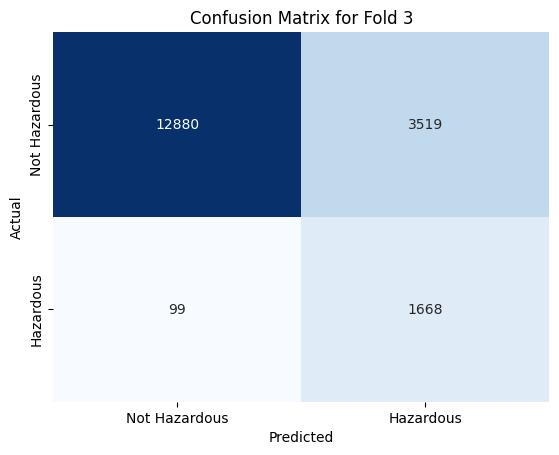

568/568 [==============================] - 1s 2ms/step
Fold 4 - F1 Score: 0.48323499784141605
Fold 4 - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     16399
           1       0.32      0.95      0.48      1767

    accuracy                           0.80     18166
   macro avg       0.66      0.87      0.68     18166
weighted avg       0.93      0.80      0.84     18166



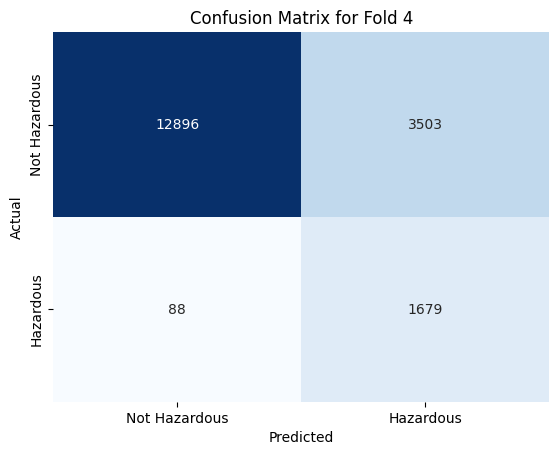

568/568 [==============================] - 1s 2ms/step
Fold 5 - F1 Score: 0.48833138856476077
Fold 5 - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     16399
           1       0.33      0.95      0.49      1766

    accuracy                           0.81     18165
   macro avg       0.66      0.87      0.68     18165
weighted avg       0.93      0.81      0.84     18165



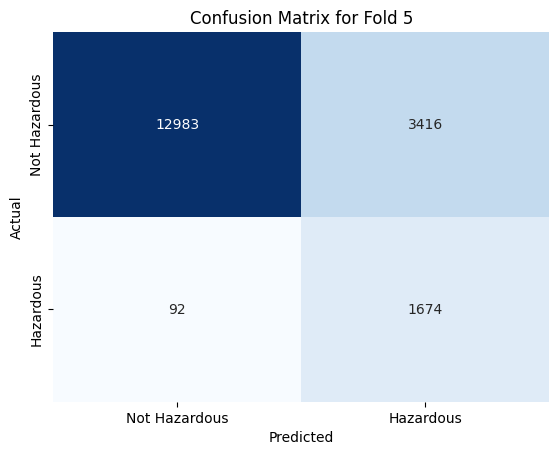

Overall F1 Score: 0.4813018884796937
Overall Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     81996
           1       0.33      0.93      0.48      8833

    accuracy                           0.81     90829
   macro avg       0.66      0.86      0.68     90829
weighted avg       0.93      0.81      0.84     90829



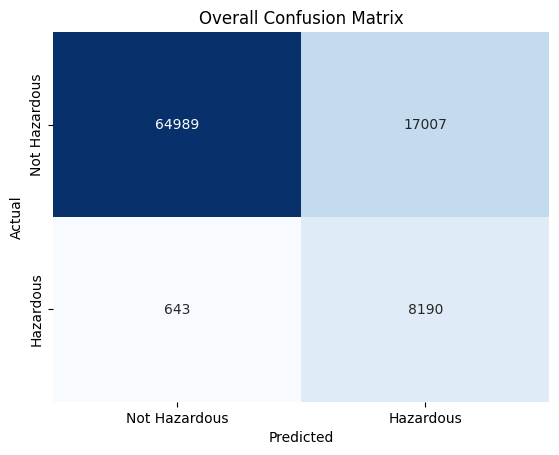

In [20]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset and define X (features) and y (target variable)
# Replace 'your_data.csv' with your dataset file and specify your target variable
X = data.drop('hazardous', axis=1)
y = data['hazardous']

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the stratified k-fold cross-validator
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []
all_f1_scores = []

# Perform stratified k-fold cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kf.split(X, y), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Build the neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'],weighted_metrics=[])

    # Create learning rate scheduler
    def lr_decay(epoch, lr):
        return lr * np.exp(-0.1)

    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=0)

    # Train the model with early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Calculate class weights
    class_weights = {0: 1, 1: 3}
    sample_weights = np.array([class_weights[class_val] for class_val in y_train])

    model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.1,
              callbacks=[early_stopping, lr_scheduler], verbose=0, sample_weight=sample_weights)

    # Evaluate the model on the test set
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate and print the F1 score and classification report for each fold
    fold_f1 = f1_score(y_test, y_pred)
    fold_report = classification_report(y_test, y_pred)

    print(f'Fold {fold} - F1 Score: {fold_f1}')
    print(f'Fold {fold} - Classification Report:\n{fold_report}')

    # Store predictions and true labels for each fold
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)
    all_f1_scores.append(fold_f1)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
               xticklabels=['Not Hazardous', 'Hazardous'], yticklabels=['Not Hazardous', 'Hazardous'])
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Calculate overall metrics
overall_f1 = np.mean(all_f1_scores)
overall_report = classification_report(all_true_labels, all_predictions)

print(f'Overall F1 Score: {overall_f1}')
print('Overall Classification Report:\n', overall_report)

# Plot overall confusion matrix
overall_cm = confusion_matrix(all_true_labels, all_predictions)
sb.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Not Hazardous', 'Hazardous'], yticklabels=['Not Hazardous', 'Hazardous'])
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**ANN with oversampling and standardization**

568/568 [==============================] - 1s 1ms/step
Fold 1 - Training F1 Score: 0.47183645886129405
Fold 1 - Testing F1 Score: 0.47317073170731705
Fold 1 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87     16400
           1       0.31      0.99      0.47      1766

    accuracy                           0.79     18166
   macro avg       0.65      0.88      0.67     18166
weighted avg       0.93      0.79      0.83     18166



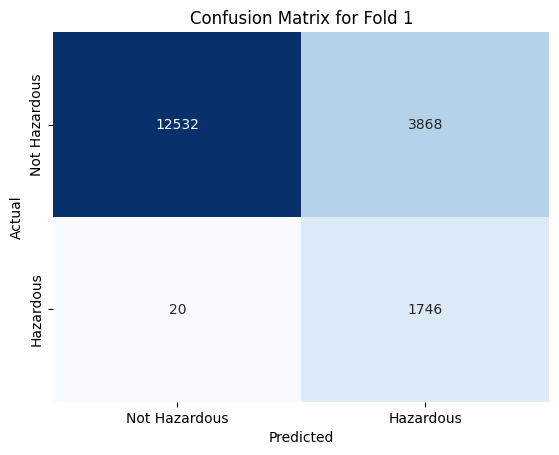

568/568 [==============================] - 1s 2ms/step
Fold 2 - Training F1 Score: 0.4724063303124577
Fold 2 - Testing F1 Score: 0.46863270777479893
Fold 2 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86     16399
           1       0.31      0.99      0.47      1767

    accuracy                           0.78     18166
   macro avg       0.65      0.87      0.67     18166
weighted avg       0.93      0.78      0.82     18166



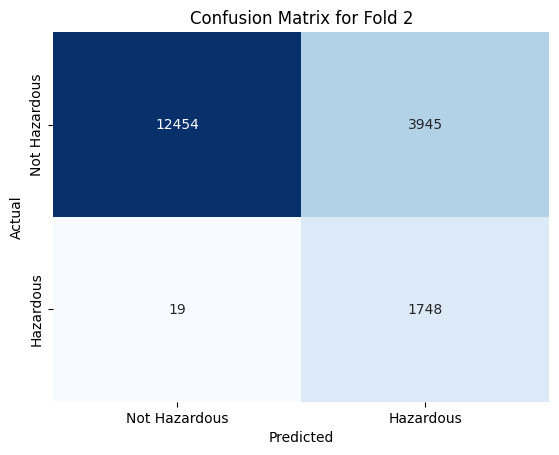

568/568 [==============================] - 1s 2ms/step
Fold 3 - Training F1 Score: 0.475150525563833
Fold 3 - Testing F1 Score: 0.47390652677476497
Fold 3 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     16399
           1       0.31      0.98      0.47      1767

    accuracy                           0.79     18166
   macro avg       0.65      0.88      0.67     18166
weighted avg       0.93      0.79      0.83     18166



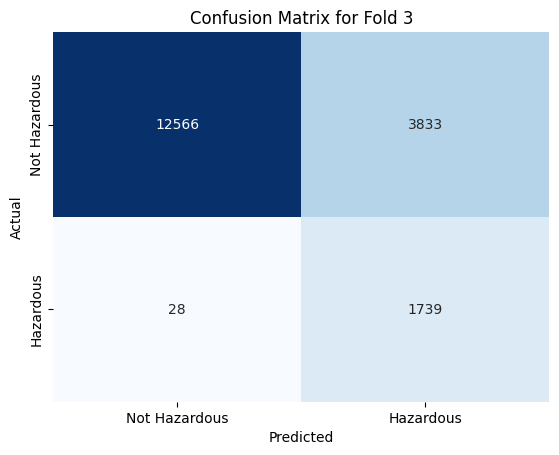

568/568 [==============================] - 1s 2ms/step
Fold 4 - Training F1 Score: 0.47360564527072874
Fold 4 - Testing F1 Score: 0.4718614718614719
Fold 4 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87     16399
           1       0.31      0.99      0.47      1767

    accuracy                           0.79     18166
   macro avg       0.65      0.88      0.67     18166
weighted avg       0.93      0.79      0.83     18166



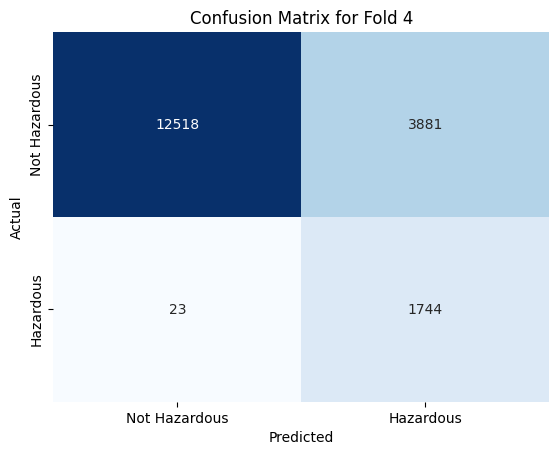

568/568 [==============================] - 1s 2ms/step
Fold 5 - Training F1 Score: 0.4735808156076413
Fold 5 - Testing F1 Score: 0.47545008183306064
Fold 5 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     16399
           1       0.31      0.99      0.48      1766

    accuracy                           0.79     18165
   macro avg       0.66      0.88      0.67     18165
weighted avg       0.93      0.79      0.83     18165



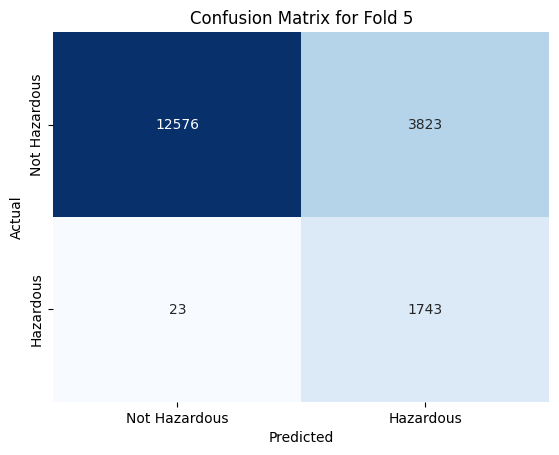

Overall Training F1 Score: 0.47331595512319097
Overall Testing F1 Score: 0.47260430399028264
Overall Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.87     81996
           1       0.31      0.99      0.47      8833

    accuracy                           0.79     90829
   macro avg       0.65      0.88      0.67     90829
weighted avg       0.93      0.79      0.83     90829



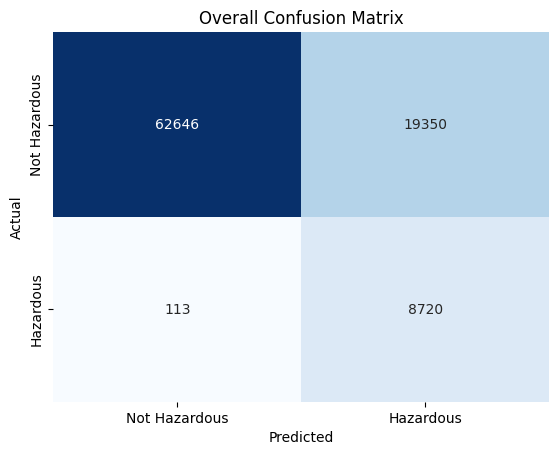

In [21]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# specifying target variable
X = data.drop('hazardous', axis=1)
y = data['hazardous']

# Standardize the data (converting data in the range of 0 to 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the stratified k-fold cross-validator
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []
all_train_f1_scores = []
all_test_f1_scores = []

# Perform stratified k-fold cross-validation
for fold, (train_index, test_index) in enumerate(stratified_kf.split(X, y), 1):
  #add here
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply oversampling to the training set using ADASYN
    adasyn = ADASYN(random_state=42)
    X_train_oversampled, y_train_oversampled = adasyn.fit_resample(X_train, y_train)

    # Build the neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_oversampled.shape[1],)),
        tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], weighted_metrics=[])

    # Create learning rate scheduler
    def lr_decay(epoch, lr):
        return lr * np.exp(-0.1)

    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_decay, verbose=0)

    # Train the model with early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train_oversampled, y_train_oversampled, epochs=7, batch_size=32, validation_split=0.1,
              callbacks=[early_stopping, lr_scheduler], verbose=0)

    # Evaluate the model on the training set
    y_train_pred_proba = model.predict(X_train)
    y_train_pred = (y_train_pred_proba > 0.5).astype(int)
    train_f1 = f1_score(y_train, y_train_pred)
    all_train_f1_scores.append(train_f1)

    # Evaluate the model on the test set
    y_test_pred_proba = model.predict(X_test)
    y_test_pred = (y_test_pred_proba > 0.5).astype(int)
    test_f1 = f1_score(y_test, y_test_pred)
    all_test_f1_scores.append(test_f1)

    # Print the F1 scores and classification report for each fold
    print(f'Fold {fold} - Training F1 Score: {train_f1}')
    print(f'Fold {fold} - Testing F1 Score: {test_f1}')

    fold_report = classification_report(y_test, y_test_pred)
    print(f'Fold {fold} - Classification Report:\n{fold_report}')

    # Store predictions and true labels for each fold
    all_predictions.extend(y_test_pred)
    all_true_labels.extend(y_test)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
               xticklabels=['Not Hazardous', 'Hazardous'], yticklabels=['Not Hazardous', 'Hazardous'])
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Calculate overall metrics
overall_train_f1 = np.mean(all_train_f1_scores)
overall_test_f1 = np.mean(all_test_f1_scores)
overall_report = classification_report(all_true_labels, all_predictions)

print(f'Overall Training F1 Score: {overall_train_f1}')
print(f'Overall Testing F1 Score: {overall_test_f1}')
print('Overall Classification Report:\n', overall_report)

# Plot overall confusion matrix
overall_cm = confusion_matrix(all_true_labels, all_predictions)
sb.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Not Hazardous', 'Hazardous'], yticklabels=['Not Hazardous', 'Hazardous'])
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()